In [1]:
import cv2
from paddleocr import PaddleOCR
import re
from PIL import Image

In [2]:
def read_text(np_image):
    img = np_image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)
    blurred = cv2.medianBlur(thresh, 13)
    ocr = PaddleOCR(use_angle_cls=True, lang='en')
    result = ocr.ocr(blurred, cls=True)
    result.sort(key=lambda x: x[0][0][0][0])
    joined_text = ""
    for line in result:
        text = line[0][1][0]
        text = re.sub(r'[^a-zA-Z0-9]', '', text)
        joined_text += text
    return joined_text

def compare_text(text, np_image):
    text = re.sub(r'[^a-zA-Z0-9]', '', text)
    read_text_result = read_text(np_image)
    if text == read_text_result:
        return True
    return False

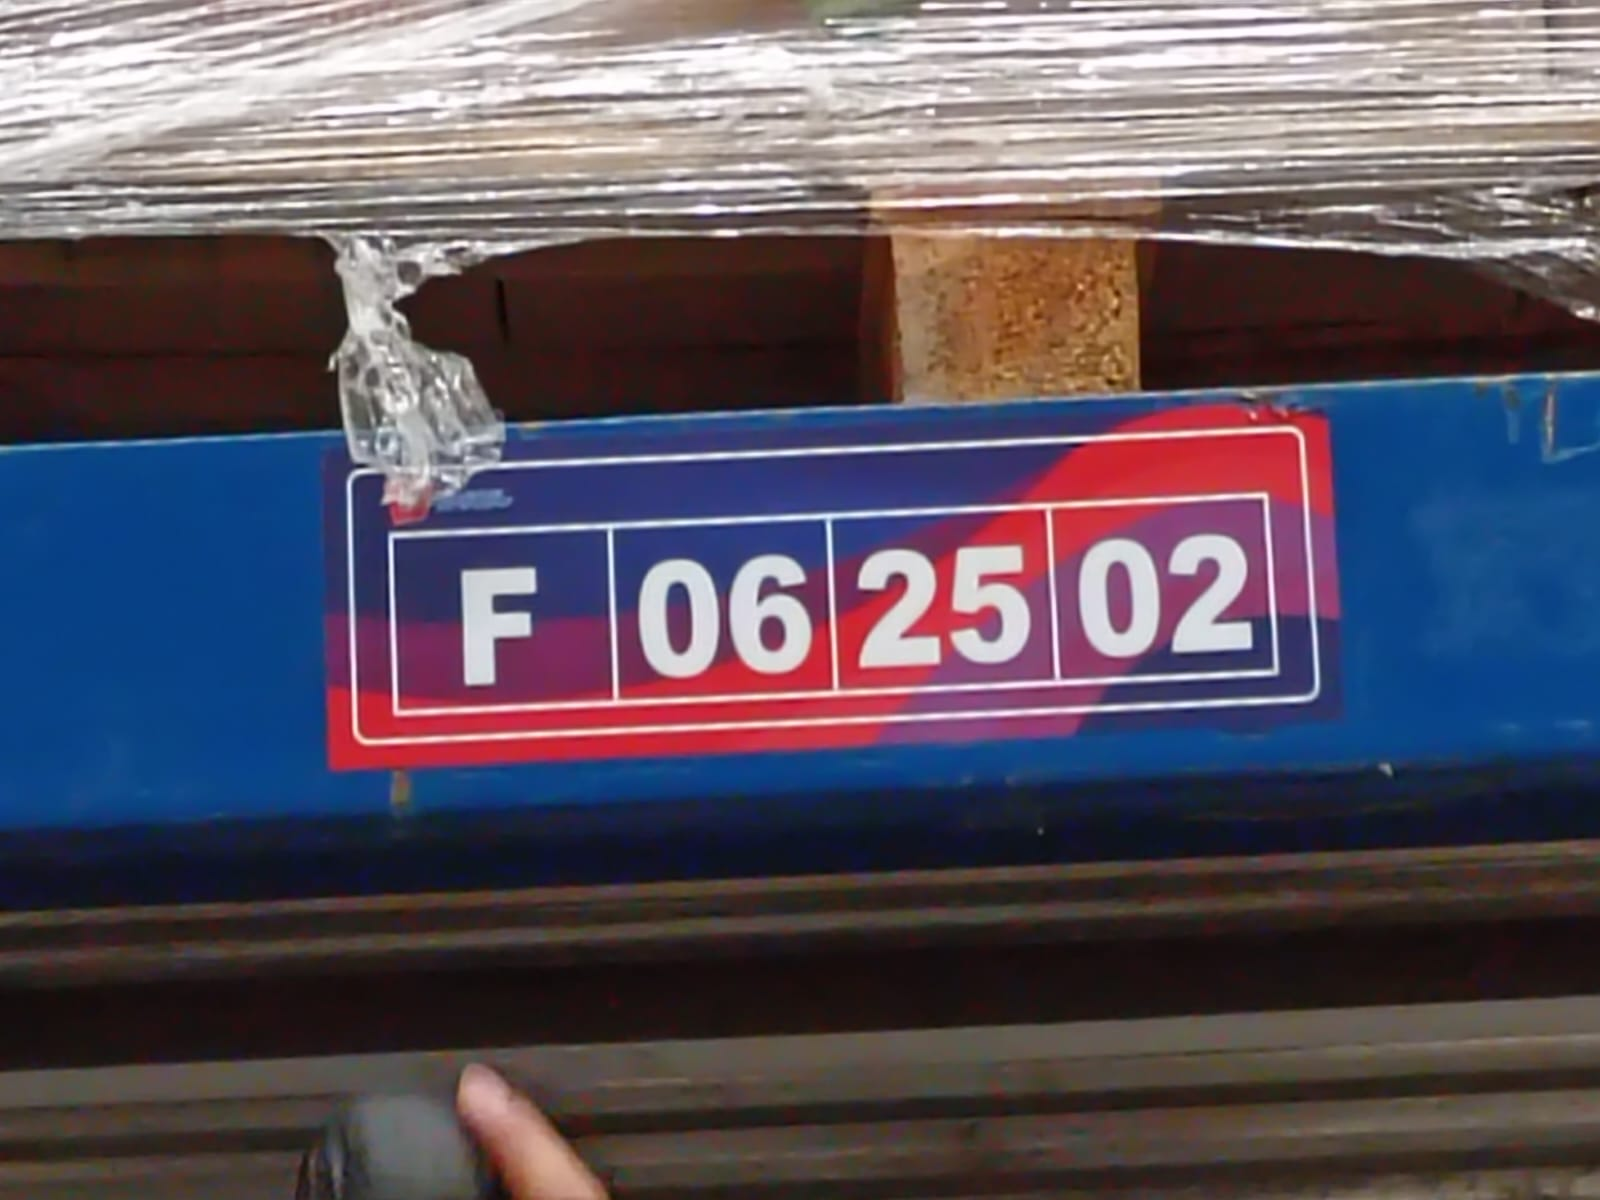

In [3]:
image_path = '../Utils/Fotos/IMG-20241105-WA0062.jpg'
img = Image.open(image_path)
img

In [4]:
import numpy as np
numpy_image = np.array(img)

compare_text("XD", numpy_image)

[2024/11/08 22:30:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/meister/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/meister/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

False

In [21]:
from flask import Flask, request, jsonify
from PIL import Image
import io

app = Flask(__name__)

@app.route('/check_image', methods=['POST'])
def upload_file():

    text = request.form.get('text')
    
    image_file = request.files.get('image')
    
    if image_file:

        image = Image.open(io.BytesIO(image_file.read()))
        np_img = np.array(image)

        isEqual = compare_text(text, np_img)

        response = {
            'isEqual': isEqual
        }
    else:
        response = {
            'error': 'No se recibió ninguna imagen'
        }
    
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=False, port=8080)

 * Serving Flask app '__main__'
 * Debug mode: off


[2024-11-08 22:52:26,708] [    INFO] _internal.py:97 - WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8080
[2024-11-08 22:52:26,708] [    INFO] _internal.py:97 - Press CTRL+C to quit


[2024/11/08 22:52:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/meister/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/meister/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

[2024-11-08 22:52:29,733] [    INFO] _internal.py:97 - 127.0.0.1 - - [08/Nov/2024 22:52:29] "POST /check_image HTTP/1.1" 200 -


[2024/11/08 22:52:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/meister/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/meister/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

[2024-11-08 22:52:35,242] [    INFO] _internal.py:97 - 127.0.0.1 - - [08/Nov/2024 22:52:35] "POST /check_image HTTP/1.1" 200 -
